<h1>Objective:</h1>

<h2>The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making.</h2>

In [1]:
# Importing libraries for data analysis and visualization
import mysql.connector   # Library for connecting to MySQL databases
import pandas as pd   # Data manipulation and analysis library
import matplotlib.pyplot as plt   # Plotting library for creating visualizations
import seaborn as sns    # Statistical data visualization library based on Matplotlib

In [2]:
# Establish a connection to the MySQL database
connection = mysql.connector.connect(
user = 'root',   # Username for database access
password = 'root',   # Password for database access
host = 'localhost',   # Hostname where the MySQL server is running
database = 'ecommerce'   # Name of the specific database to connect to
)

In [3]:
# Create a cursor object to interact with the MySQL database
cursor = connection.cursor()

In [4]:
# Execute SQL queries to retrieve data from the database tables
cursor.execute("select * from product")

# Fetch the results and create a Pandas DataFrame with column names from the cursor description
prod_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from order_details")
order_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from customer")
cust_df = pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

# Execute a complex SQL query using JOIN operations to combine data from multiple tables
cursor.execute("""SELECT c.customer_id, c.name AS customer_name, c.city, c.email, c.phone_no, c.address, c.pin_code,
    o.order_id, o.product_id, o.quantity, o.total_price, o.payment_mode, o.order_date, o.order_status,
    p.product_name, p.category, p.sub_category, p.original_price, p.selling_price FROM customer c
    LEFT JOIN order_details o ON c.customer_id = o.customer_id
    LEFT JOIN product p ON o.product_id = p.product_id """)

# Fetch the results and create a Pandas DataFrame with column names from the cursor description
cust_order_prod_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Close the cursor and the database connection
cursor.close()
connection.close()

In [5]:
# Display the first few rows of the 'prod_df' DataFrame to inspect the product data
prod_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [6]:
# Display the first few rows of the 'order_df' DataFrame to inspect the order data
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [7]:
# Display the first few rows of the 'cust_df' DataFrame to inspect the customer data
cust_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


<h1>Data Cleaning:</h1>

<h3>(i) Product Part :</h3>

In [8]:
# Retrieve the dimensions (number of rows and columns) of the 'prod_df' DataFrame
prod_df.shape

(61, 7)

In [9]:
# Display concise information about the 'prod_df' DataFrame, including data types and memory usage
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [10]:
# Generate descriptive statistics for the numerical columns of the 'prod_df' DataFrame
prod_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [11]:
# Generate descriptive statistics for the categorical (object) columns of the 'prod_df' DataFrame
# Transpose the result for better readability
prod_df.describe(include=object).T

,count,unique,top,freq
product_id,61,61,P102,1
product_name,61,43,Tablet,4
category,61,4,Electronics,32
sub_category,61,22,Electronics,20


In [12]:
# Count the number of missing values (null or NaN) in each column of the 'prod_df' DataFrame
prod_df.isnull().value_counts()

product_id  product_name  category  sub_category  original_price  selling_price  stock
False       False         False     False         False           False          False    61
Name: count, dtype: int64

In [13]:
# Count the occurrences of each unique value in the 'category' column of the 'prod_df' DataFrame
prod_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

In [14]:
# Replace occurrences of 'furniture' with 'Furniture' in the 'category' column of 'prod_df'
prod_df['category'] = prod_df['category'].replace('furniture','Furniture')

In [15]:
# Count the occurrences of each unique value in the 'category' column after the replacement
prod_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

In [16]:
# Count the occurrences of duplicated rows in the 'prod_df' DataFrame
prod_df.duplicated().value_counts()

False    61
Name: count, dtype: int64

<h3>(ii) Order Part :</h3>

In [17]:
# Retrieve the dimensions (number of rows and columns) of the 'order_df' DataFrame
order_df.shape

(76, 8)

In [18]:
# Display concise information about the 'order_df' DataFrame, including data types and memory usage
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [19]:
# Generate descriptive statistics for the numerical columns of the 'order_df' DataFrame
order_df.describe()

,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,28.673660,0.558664,18442.574791,NaN


In [20]:
# Generate descriptive statistics for the categorical (object) columns of the 'order_df' DataFrame
# Transpose the result for better readability
order_df.describe(include=object).T

,count,unique,top,freq
customer_id,76,59,C1013,3
product_id,76,58,P102,3
payment_mode,76,2,Online,43
order_status,76,6,Delivered,27


In [21]:
# Count the number of missing values (null or NaN) in each column of the 'order_df' DataFrame
order_df.isnull().value_counts()

order_id  customer_id  product_id  quantity  total_price  payment_mode  order_date  order_status
False     False        False       False     False        False         False       False           76
Name: count, dtype: int64

In [22]:
# Count the occurrences of each unique value in the 'order_status' column of the 'order_df' DataFrame
order_df['order_status'].value_counts()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64

In [23]:
# Replace occurrences of 'delivered' with 'Delivered' in the 'order_status' column of 'order_df'
order_df['order_status'] = order_df['order_status'].replace('delivered','Delivered')

In [24]:
# Count the occurrences of each unique value in the 'order_status' column after the replacement
order_df['order_status'].value_counts()

order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64

In [25]:
# Count the occurrences of duplicated rows in the 'order_df' DataFrame
order_df.duplicated().value_counts()

False    76
Name: count, dtype: int64

<h3>(iii) Customer Part :</h3>

In [26]:
# Retrieve the dimensions (number of rows and columns) of the 'cust_df' DataFrame
cust_df.shape

(62, 7)

In [27]:
# Display concise information about the 'cust_df' DataFrame, including data types and memory usage
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [28]:
# Generate descriptive statistics for the numerical columns of the 'cust_df' DataFrame
cust_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [29]:
# Generate descriptive statistics for the categorical (object) columns of the 'cust_df' DataFrame
# Transpose the result for better readability
cust_df.describe(include=object).T

,count,unique,top,freq
customer_id,62,62,C1001,1
name,62,39,Ava,4
city,62,4,Tokyo,22
email,62,52,henry@gmail.com,3
phone_no,62,26,1234567890,11
address,62,57,oo.pp.road,2


In [30]:
# Count the number of missing values (null or NaN) in each column of the 'cust_df' DataFrame
cust_df.isnull().value_counts()

customer_id  name   city   email  phone_no  address  pin_code
False        False  False  False  False     False    False       62
Name: count, dtype: int64

In [31]:
# Count the occurrences of duplicated rows in the 'cust_df' DataFrame
cust_df.duplicated().value_counts()

False    62
Name: count, dtype: int64

<h1>Exploratory Data Analysis (EDA) and Visualization :</h1>

<h2>Customer Analysis :</h2>

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


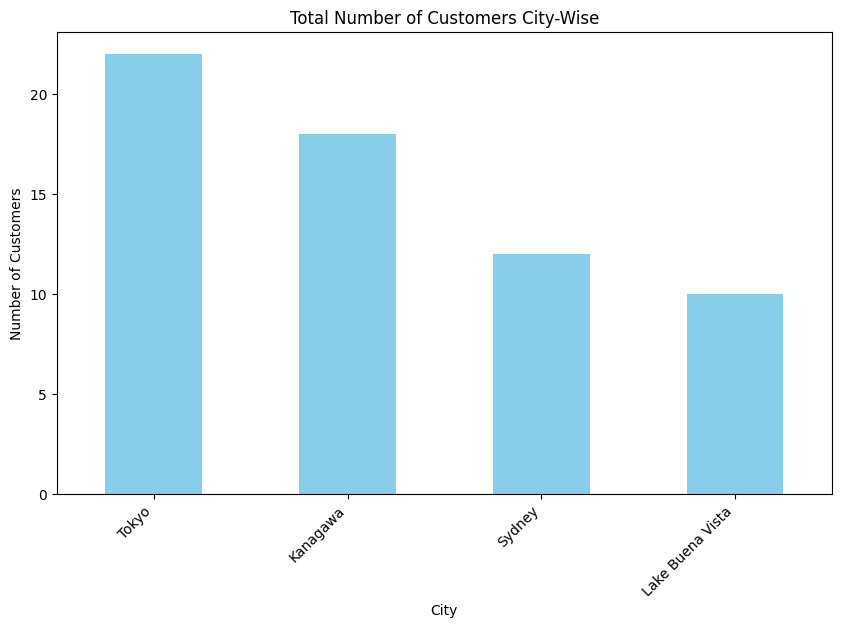

In [32]:
# Identify the total number of customers city wise.
# Counting customers city-wise
cust_count_by_city = cust_df['city'].value_counts()

print(cust_count_by_city)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
cust_count_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Number of Customers City-Wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Insight : The bar chart displays the distribution of customers across different cities.

Inference : It provides a geographical overview of the customer base, identifying cities with heigher customer concentratio.

Observation : Tokyo has the maximum number of the customers whereas Lake Buena Vista has the minimum number of customer.



  customer_id  order_frequency
0       C1013                3
1       C1010                3
2       C1005                3
3       C1009                3
4       C1017                2
5       C1016                2
6       C1015                2
7       C1014                2
8       C1011                2
9       C1019                2


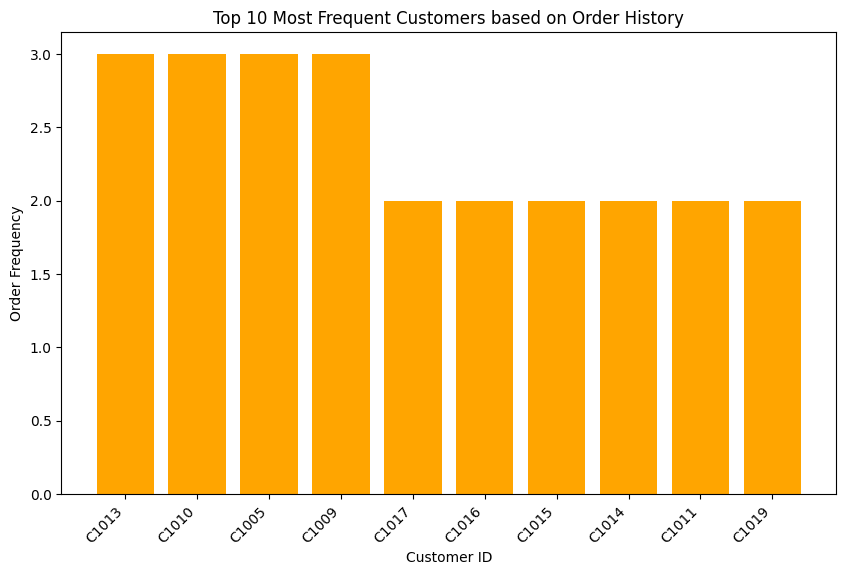

In [33]:
#Identify the most frequent customers based on their order history.
# Count the frequency of each customer based on their order history
customer_order_frequency = cust_order_prod_df['customer_id'].value_counts().reset_index()
customer_order_frequency.columns = ['customer_id','order_frequency']

# Identify the most frequent customers
most_frequent_customers = customer_order_frequency.head(10)

print(most_frequent_customers)


# Plotting the bar chart for the most frequent customers
plt.figure(figsize=(10, 6))
plt.bar(most_frequent_customers['customer_id'], most_frequent_customers['order_frequency'], color='orange')
plt.title('Top 10 Most Frequent Customers based on Order History')
plt.xlabel('Customer ID')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Insight : The bar chart visualizes the top 10 most frequent customers based on their order history.

Infence ce: Customers with higher order frequencies may be considered as loyal or regular customers.

Ovation tion: Customer IDs with corresponding order frequencies are presented in the chart, providing a quick overview of the most engaged customers.








<h2>Product Analysis :</h2>

      category  total_products
0    Appliance              20
1  Electronics              32
2    Furniture               9


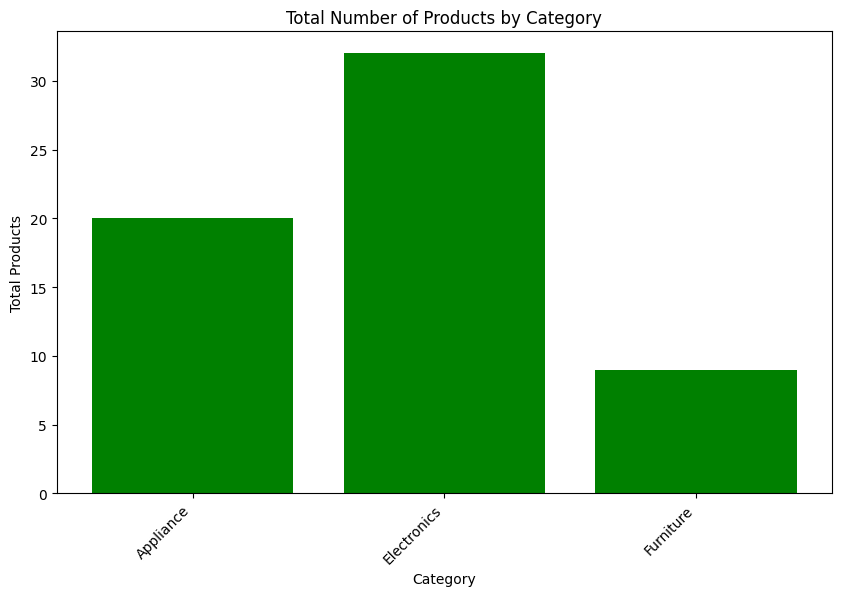

In [34]:
# Determine the total number of products available by category.
# Group by 'category' and count the unique 'product_id' to get the total number of products by category
products_by_category = prod_df.groupby('category')['product_id'].nunique().reset_index()
products_by_category.columns = ['category', 'total_products']

print(products_by_category)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(products_by_category['category'], products_by_category['total_products'], color='green')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Total Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Insight: The bar chart visualizes the total number of products available in each category.

Inference: Categories with a higher count of unique products may have a more diverse product range.

Observation: The chart displays the total number of products for each cate. We can see that Electronic category has the maximum number of products available whereas Furniture category has the minimum.

ies.

In [35]:
# Analyze the distribution of products across sub-categories.
# Group by 'category' and 'sub_category' and count the unique 'product_id' to analyze distribution
product_distribution = prod_df.groupby(['category', 'sub_category'])['product_id'].nunique().reset_index()
product_distribution.columns = ['category', 'sub_category', 'product_count']

print(product_distribution)

       category   sub_category  product_count
0     Appliance    Electronics             20
1   Electronics    Accessories              2
2   Electronics          Audio              3
3   Electronics        Cameras              1
4   Electronics      Computers              9
5   Electronics       Consoles              1
6   Electronics  Entertainment              3
7   Electronics        Mobiles              1
8   Electronics    Photography              1
9   Electronics       Printers              1
10  Electronics            TVs              1
11  Electronics        Tablets              2
12  Electronics      Wearables              5
13  Electronics       computer              1
14  Electronics          phone              1
15    Furniture         Chairs              2
16    Furniture          Desks              1
17    Furniture      Furniture              1
18    Furniture          Lamps              2
19    Furniture          Sofas              1
20    Furniture         Tables    

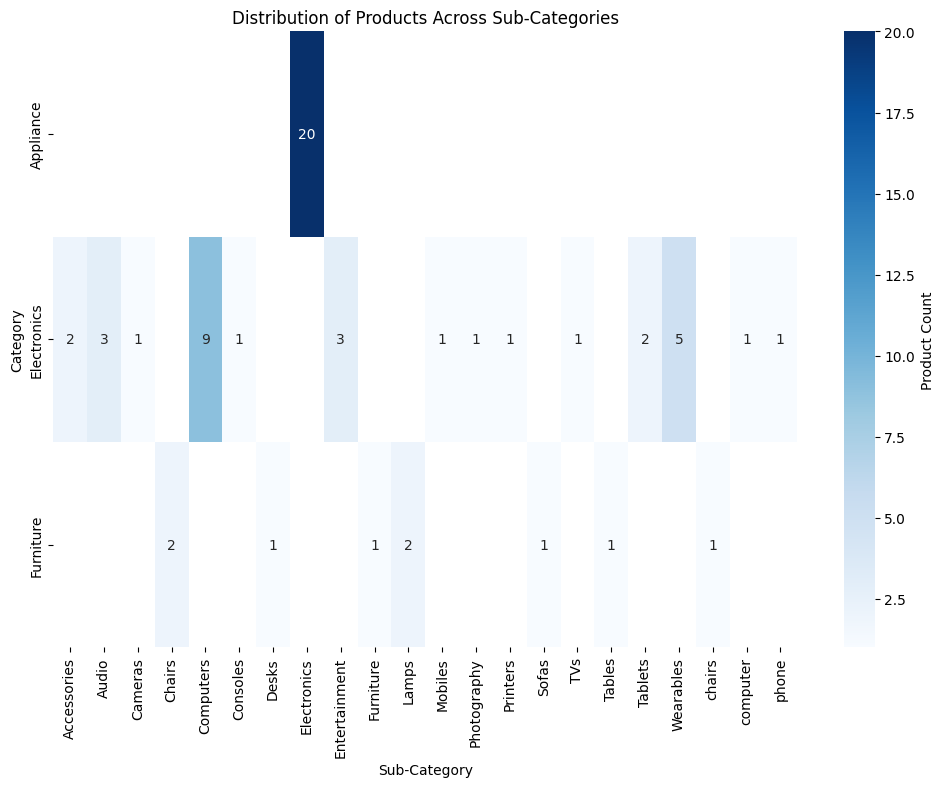

In [36]:
# Pivot the dataframe for a heatmap
heatmap_data = product_distribution.pivot(index='category', columns='sub_category', values='product_count')

# Visualize the results using a heatmap
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt="g", cbar_kws={'label': 'Product Count'})

# Adding labels and title
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Category')
ax.set_title('Distribution of Products Across Sub-Categories')

# Display the plot
plt.show()

Insight: The heatmap visualize the distribution of product counts across sub-categories within different categories.

Inference: The heatmap provides an intuitive representation of product counts, highlighting the diversity and concentration of products in various sub-categories for each category.

Observation: The plotted heatmap with labeled axes and title facilitates the quick interpretation of how products are distributed across different sub-categories. Electronic sub-cateory has the maximum number of products followed by Computer, Wearables and so on.



   product_id         product_name     category sub_category  original_price  \
0        P102                Chair    Furniture       Chairs         20000.0   
3        P105              Blender    Appliance  Electronics           500.0   
10       P112                chair    Furniture       chairs          1000.0   
12       P114         Refrigerator    Appliance  Electronics         20000.0   
30       P132             Sofa Set    Furniture    Furniture         50000.0   
33       P135           Dishwasher    Appliance  Electronics         18000.0   
39       P141              Printer  Electronics    Computers         12000.0   
42       P144  External Hard Drive  Electronics    Computers          5000.0   
46       P148               Tablet  Electronics    Computers         30000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
10          800.0     10  
12        18000.0     12  
30        45000.0     10  
33        15000.0     12  
39        

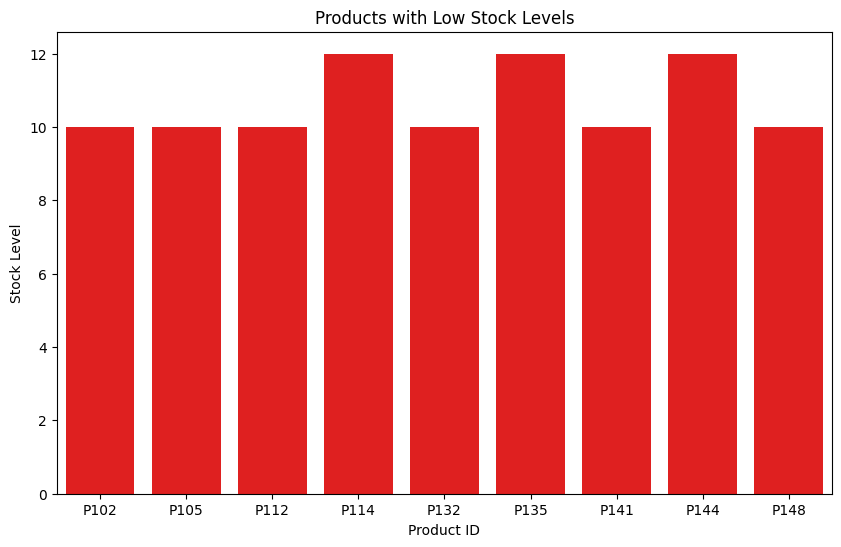

In [37]:
#Identify products with low stock levels.
# Set a threshold for low stock levels (adjust as needed)
low_stock_threshold = 15

# Identify products with low stock levels
low_stock_products = prod_df[prod_df['stock'] < low_stock_threshold]

print(low_stock_products)

# Plotting a bar chart to visualize products with low stock levels
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='stock', data=low_stock_products, color='red')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product ID')
plt.ylabel('Stock Level')
plt.show()

Insight: The bar chart visualizes products with stock levels below a specified threshold, highlighting potential low stock issues.

Inference: Products with stock levels below the set threshold may require attention to avoid stockouts and meet customer demand.

Observation: Three products have stock level 12, rest have stock levels below 12








Average Price: 17774.62262295082
Maximum Price: 70000.0
Minimum Price: 450.0


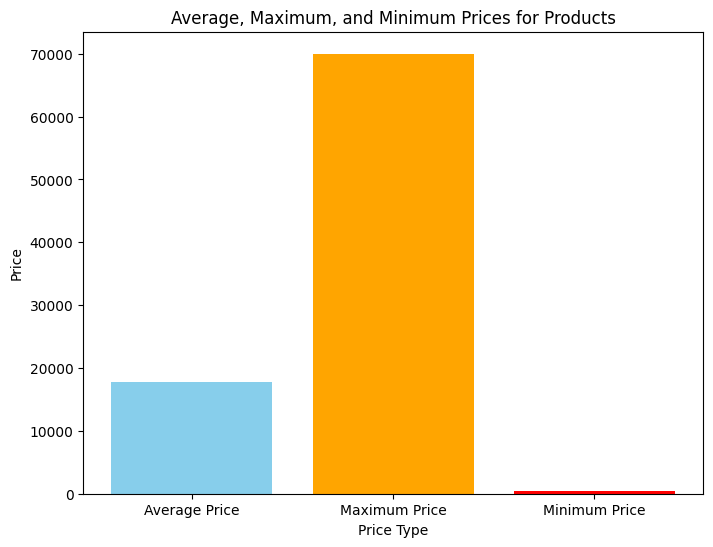

In [38]:
# Calculate average, maximum, and minimum prices
average_price = prod_df['selling_price'].mean()
max_price = prod_df['selling_price'].max()
min_price = prod_df['selling_price'].min()

# Print the calculated values
print(f'Average Price: {average_price}')
print(f'Maximum Price: {max_price}')
print(f'Minimum Price: {min_price}')

# Visualize the results
plt.figure(figsize=(8, 6))

# Bar plot for average, maximum, and minimum prices
prices = [average_price, max_price, min_price]
labels = ['Average Price', 'Maximum Price', 'Minimum Price']

plt.bar(labels, prices, color=['skyblue', 'orange', 'red'])

# Adding labels and title
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Average, Maximum, and Minimum Prices for Products')

# Display the plot
plt.show()

Insight: The code calculates and visualizes the average, maximum, and minimum selling prices for products, providing a summary of price distribution.

Inference: Understanding the average, maximum, and minimum prices helps in assessing the overall pricing strategy and identifying potential outliers or pricing anomalies.

Obseion:rvat The Average Price is 17774.62, Maximum Price is 70000 and Minimum Price is ion:

<h2>Order Analysis :</h2>

product_name
Tablet               5
Vacuum Cleaner       4
Air Purifier         3
Chair                3
Coffee Maker         3
Digital Camera       3
Smartwatch           3
Television           3
Blender              2
Bluetooth Speaker    2
Name: order_id, dtype: int64


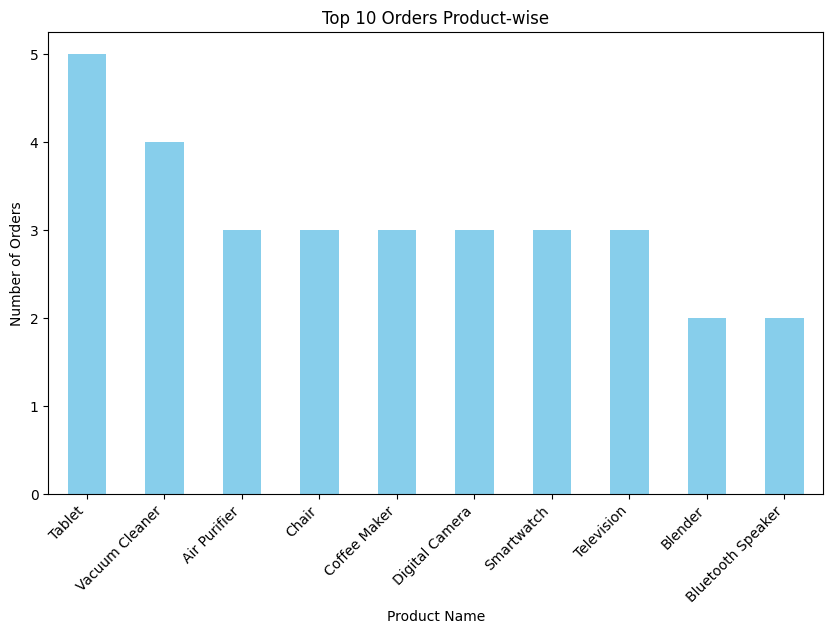

In [39]:
#Calculate the top 10 orders product wise.
top_10_orders_product_wise = cust_order_prod_df.groupby('product_name')['order_id'].count().nlargest(10)

print(top_10_orders_product_wise)

# Visualize the results
plt.figure(figsize=(10, 6))

# Bar plot for top 10 orders product-wise
top_10_orders_product_wise.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.title('Top 10 Orders Product-wise')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The code identifies and visualizes the top 10 products with the highest number of orders, offering a snapshot of popular products.

Inference: Products appearing in the top 10 orders frequently are likely to be customer favorites or bestsellers, providing insights into customer preferences.

Observation: The bar plot presents a clear view of the most ordered prod. We can see that Tablet is the most ordered product followed by Vacuum Cleaner, Air Purifier, Chair and soies.

  order_status  count
0    Delivered     28
1      Pending     25
2      Shipped     16
3    Cancelled      6
4     Returned      1


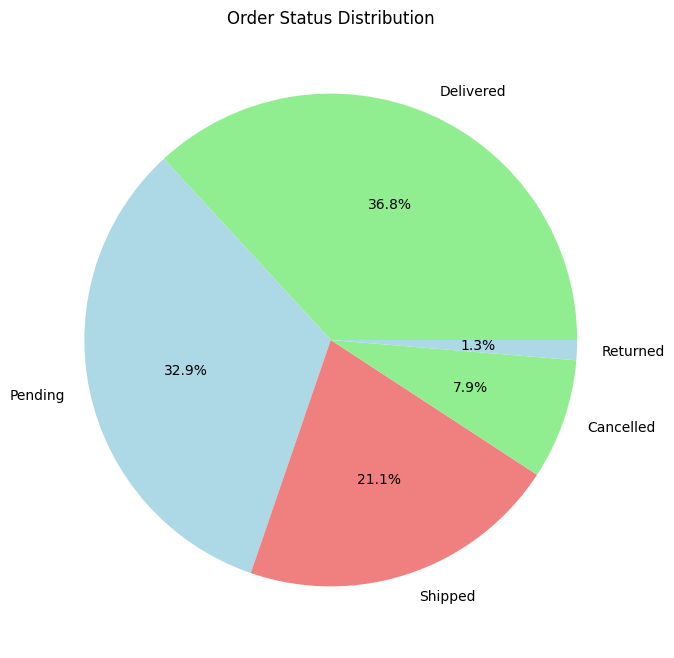

In [40]:
#Analyze the order status distribution (e.g., pending, delivered)
# Analyze the order status distribution
order_status_distribution = order_df['order_status'].value_counts().reset_index()
order_status_distribution.columns = ['order_status', 'count']

print(order_status_distribution)

# Plotting a pie chart to visualize order status distribution
plt.figure(figsize=(8, 8))
plt.pie(order_status_distribution['count'], labels=order_status_distribution['order_status'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Order Status Distribution')
plt.show()

Insight: The pie chart visually represents the distribution of order statuses, providing a quick overview of the proportion of pending, delivered, and other order statuses.

Inference: Understanding the order status distribution helps in assessing the efficiency of the order fulfillment process and identifying areas for improvement.

Obseron: vatiMost of the products have been delivered, some of are pending, few have been cancelion.

      product_name  quantity
0           Tablet       7.0
1   Vacuum Cleaner       7.0
2       Smartwatch       5.0
3     Air Purifier       4.0
4     Coffee Maker       4.0
5             Desk       4.0
6        Desk Lamp       4.0
7  Fitness Tracker       4.0
8        Microwave       4.0
9       Television       4.0


C:\Users\COM\AppData\Local\Temp\ipykernel_7900\967945691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='quantity', data=most_popular_products, palette='viridis')


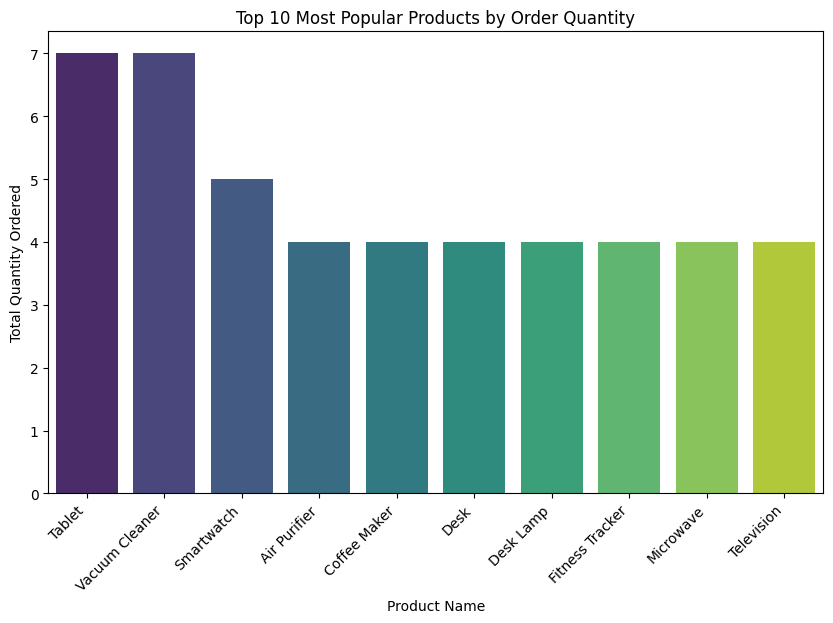

In [41]:
#Identify the most popular products based on order quantity.
# Group by 'product_id' and sum the quantities to identify the most popular products
most_popular_products = cust_order_prod_df.groupby('product_name')['quantity'].sum().nlargest(10).reset_index()

print(most_popular_products)

# Plotting a bar chart to visualize the most popular products based on order quantity
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='quantity', data=most_popular_products, palette='viridis')
plt.title('Top 10 Most Popular Products by Order Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The bar chart effectively illustrates the top 10 most popular products based on the total quantity ordered, providing a snapshot of high-demand items.

Inference: Products with the highest total quantity ordered are likely to be popular among customers, indicating strong demand and potential profitability.

Observn: Tatioablet and Vacuum Cleaner aren of the most popular prod followed by Smartwatch, Air Purifier and n.ems.

<h2>Sales Analysis :</h2>

           product_name  total_revenue_per_product
33               Tablet                   297000.0
34           Television                   208000.0
31             Sofa Set                   180000.0
6                  Desk                   148000.0
29           Smartwatch                   140000.0
35       Vacuum Cleaner                   139000.0
17               Laptop                   110000.0
0          Air Purifier                   100000.0
18            Microwave                    78000.0
13      Fitness Tracker                    74000.0
9          Dining Table                    70000.0
14       Gaming Console                    70000.0
26         Refrigerator                    58000.0
30                 Sofa                    56000.0
4                 Chair                    55000.0
8        Digital Camera                    51500.0
39                chair                    51000.0
23              Printer                    50000.0
24            Projector        

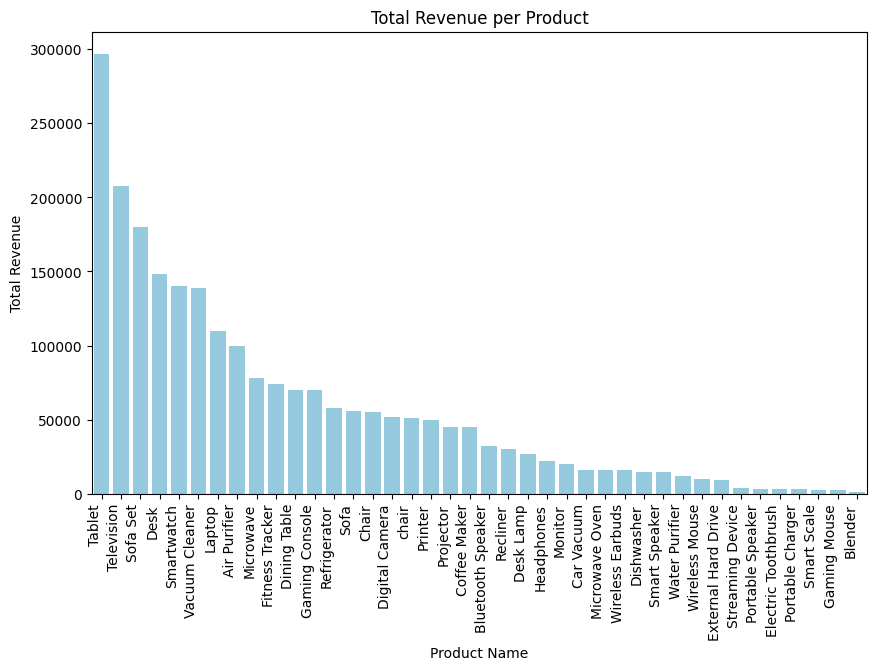

In [42]:
#Calculate total revenue generated from orders product wise.
# Calculate total revenue per product
cust_order_prod_df['total_revenue_per_product'] =cust_order_prod_df['total_price'] * cust_order_prod_df['quantity']

# Group by 'product_id' and sum the total revenues to get total revenue per product
total_revenue_per_product = cust_order_prod_df.groupby('product_name')['total_revenue_per_product'].sum().reset_index().sort_values(by='total_revenue_per_product',ascending=False)

print(total_revenue_per_product)

# Plotting a bar chart to visualize total revenue per product
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='total_revenue_per_product', data=total_revenue_per_product, color='skyblue')
plt.title('Total Revenue per Product')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90, ha='right')
plt.show()

Insight: The analysis and visualization of total revenue per product highlight the financial contribution of each product, aiding in identifying high-performing items.

Inference: Products with higher total revenue play a crucial role in the overall financial success of the business, suggesting potential areas for marketing focus or strategic investment.

Observation: The bar chart provides a visual representation of the distribution of total revenue across different products, assisting in identifying key revenue-generating products and making informed business decisions.








In [43]:
#Calculate the total revenue generated from all orders
# Calculate the total revenue from all orders
total_revenue_all_orders = order_df['total_price'].sum()

print("Total Revenue from All Orders:", total_revenue_all_orders)

Total Revenue from All Orders: 1586400.0


Insight: The calculated total revenue from all orders provides a comprehensive view of the overall financial performance.

Inference: Understanding the total revenue is essential for assessing the overall success of the business and making strategic decisions.

ObservatiTn: the totalenue rev is 15864tus.

      category  total_revenue_per_category
0    Appliance                   20.988545
1  Electronics                   51.704699
2    Furniture                   24.826373
3    furniture                    2.480382


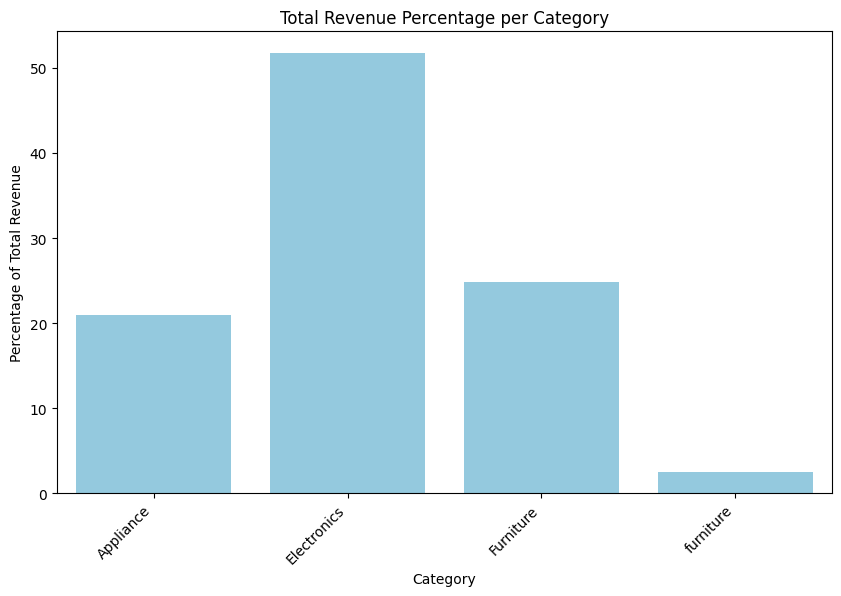

In [44]:
#Calculate total revenue product category wise percentage.
# Calculate total revenue per category
cust_order_prod_df['total_revenue_per_category'] = cust_order_prod_df['total_price'] * order_df['quantity']

# Calculate total revenue from all orders
total_revenue_all_orders = cust_order_prod_df['total_revenue_per_category'].sum()

# Group by 'category' and calculate the percentage of total revenue
revenue_percentage_per_category = (cust_order_prod_df.groupby('category')['total_revenue_per_category'].sum() / total_revenue_all_orders) * 100
revenue_percentage_per_category = revenue_percentage_per_category.reset_index()

print(revenue_percentage_per_category)

# Plotting a bar chart to visualize total revenue percentage per category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='total_revenue_per_category', data=revenue_percentage_per_category, color='skyblue')
plt.title('Total Revenue Percentage per Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The bar chart illustrates the percentage distribution of total revenue across different product categories, providing insights into the contribution of each category to overall revenue.

Inference: Categories with higher percentage contributions are more significant in terms of revenue generation, influencing strategic business decisions.

Obsrvon: a tiThe Electronic category has the  heighest revenue percentagies.

In [45]:
#Analyze the performance of different product categories in terms of sales.
category_sales_analysis = cust_order_prod_df.groupby('category')['quantity'].sum().reset_index()
category_sales_analysis.columns = ['category', 'total_sales']

print(category_sales_analysis)

      category  total_sales
0    Appliance         37.0
1  Electronics         45.0
2    Furniture         18.0
3    furniture          3.0


   product_id         product_name     category sub_category  original_price  \
3        P105              Blender    Appliance  Electronics           500.0   
10       P112                chair    Furniture       chairs          1000.0   
17       P119            Desk Lamp    Furniture        Lamps          3000.0   
49       P151         Gaming Mouse  Electronics    Computers          3000.0   
52       P154       Wireless Mouse  Electronics    Computers          2500.0   
58       P160     Portable Speaker    Appliance  Electronics          3500.0   
59       P161          Smart Scale    Appliance  Electronics          3000.0   
16       P118           Headphones  Electronics        Audio          5000.0   
42       P144  External Hard Drive  Electronics    Computers          5000.0   
44       P146         Coffee Maker    Appliance  Electronics          6000.0   

    selling_price  profit  
3           450.0   -50.0  
10          800.0  -200.0  
17         2500.0  -500.0  
49     

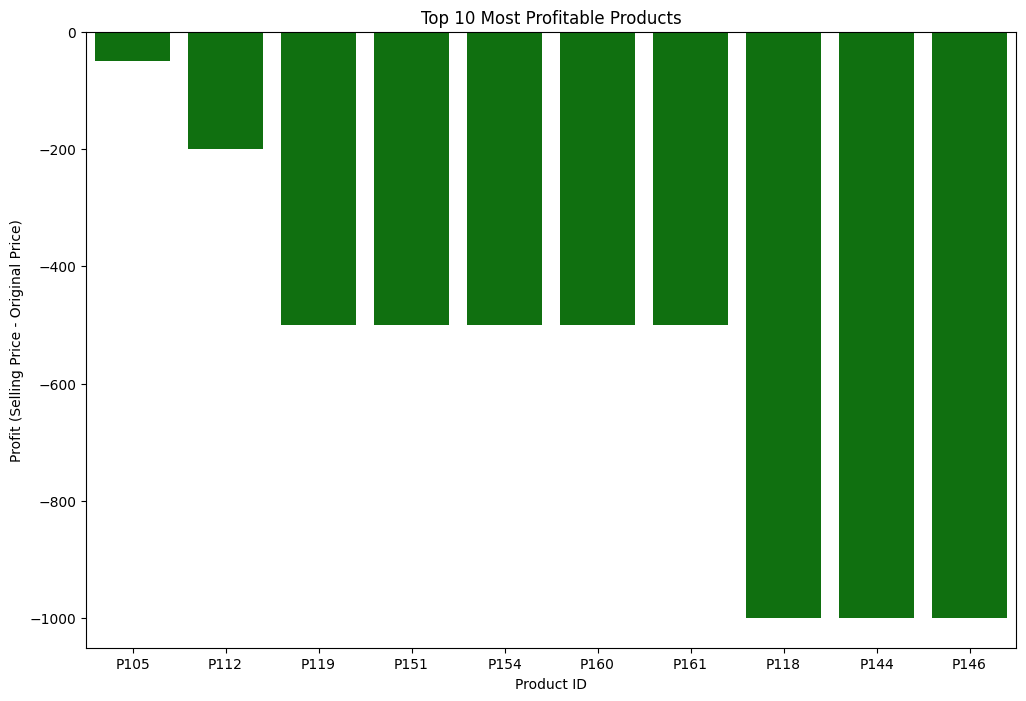

In [46]:
#Identify the most profitable products based on the difference between original and selling prices
# Calculate the profit for each product
prod_df['profit'] = prod_df['selling_price'] - prod_df['original_price']

# Identify the most profitable products
most_profitable_products = prod_df.nlargest(10, 'profit')

print(most_profitable_products[['product_id', 'product_name', 'category', 'sub_category', 'original_price', 'selling_price', 'profit']])

# Plotting a bar chart to visualize the most profitable products
plt.figure(figsize=(12, 8))
sns.barplot(x='product_id', y='profit', data=most_profitable_products, color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Profit (Selling Price - Original Price)')
plt.show()

Insight: The bar chart visually represents the top 10 most profitable products based on the difference between their original and selling prices.

Inference: Products with higher profit margins contribute significantly to overall profitability and may be strategic focuses for marketing or pricing strategies.

Obseion: rvatCoffee Maker is the most profitable producion:

<h2>Customer Order Patterns :</h2>

In [47]:
#Identify product names with the highest and lowest order quantities.
# Group by 'product_id' and sum the quantities
product_quantity_summary = cust_order_prod_df.groupby('product_name')['quantity'].sum().reset_index()

# Identify product names with the highest and lowest order quantities
product_name_highest_quantity = product_quantity_summary.nlargest(1, 'quantity')['product_name'].values[0]
product_name_lowest_quantity = product_quantity_summary.nsmallest(1, 'quantity')['product_name'].values[0]

print("Product with the highest order quantity:", product_name_highest_quantity)
print("Product with the lowest order quantity:", product_name_lowest_quantity)

Product with the highest order quantity: Tablet
Product with the lowest order quantity: Dishwasher


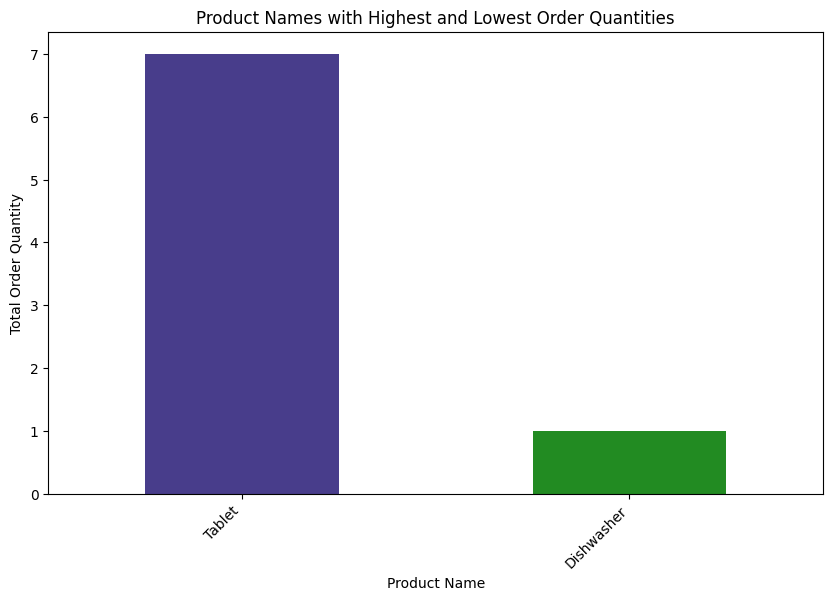

In [48]:
# Calculate total order quantities for each product
product_order_quantities = cust_order_prod_df.groupby('product_name')['quantity'].sum()

# Identify product names with the highest and lowest order quantities
highest_quantity_product = product_order_quantities.idxmax()
lowest_quantity_product = product_order_quantities.idxmin()

# Create a bar chart showing only the product names with the highest and lowest order quantities
plt.figure(figsize=(10, 6))
product_order_quantities[[highest_quantity_product, lowest_quantity_product]].plot(kind='bar', color=['DarkSlateBlue', 'ForestGreen'])
plt.title('Product Names with Highest and Lowest Order Quantities')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The code identifies and prints the product names with the highest and lowest order quantities, providing insights into ordering patterns.

Inference: Products with the highest order quantities may indicate popular or essential items, while those with the lowest quantities might be niche or less in demand.

Obseron: vatiTablet is the heighest ordered product whereas Didhwasher is the lowest ordered producon: 

In [49]:
#Identify customers with the highest and lowest order quantities by customer name
# Group by 'customer_id' and calculate total order quantity
customer_order_quantity =cust_order_prod_df.groupby('customer_name')['quantity'].sum().reset_index()

# Identify customers with the highest and lowest order quantities
highest_quantity_customer = customer_order_quantity.nlargest(1, 'quantity')['customer_name'].values[0]
lowest_quantity_customer = customer_order_quantity.nsmallest(1, 'quantity')['customer_name'].values[0]

print("Customer with the highest order quantities:", highest_quantity_customer)
print("Customer with the lowest order quantities:", lowest_quantity_customer)

Customer with the highest order quantities: Oliver
Customer with the lowest order quantities: Steve


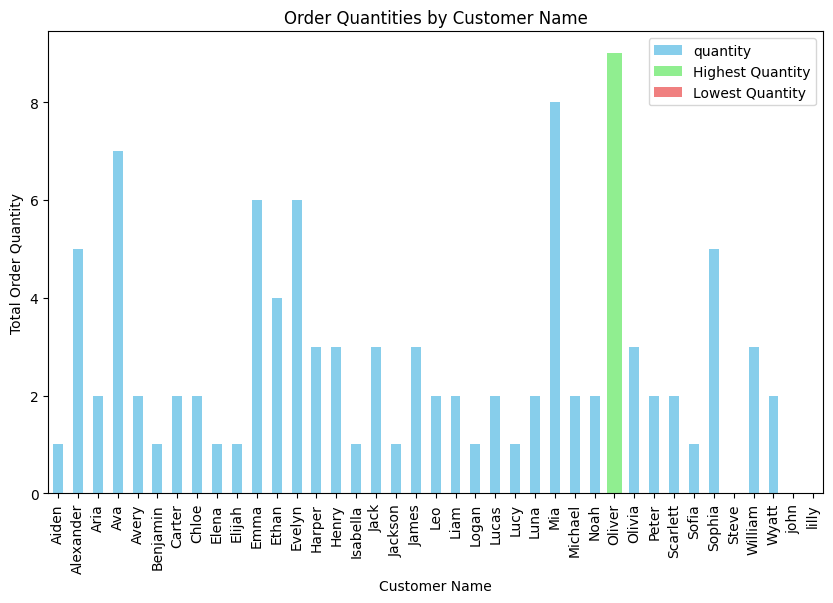

In [50]:
# Visualize the results using a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for order quantities by customer name
customer_order_quantity.plot(kind='bar', x='customer_name', y='quantity', ax=ax, color='skyblue')

# Highlight the highest and lowest customers
ax.bar(customer_order_quantity[customer_order_quantity['customer_name'] == highest_quantity_customer].index,
       customer_order_quantity[customer_order_quantity['customer_name'] == highest_quantity_customer]['quantity'],
       color='lightgreen', label='Highest Quantity')

ax.bar(customer_order_quantity[customer_order_quantity['customer_name'] == lowest_quantity_customer].index,
       customer_order_quantity[customer_order_quantity['customer_name'] == lowest_quantity_customer]['quantity'],
       color='lightcoral', label='Lowest Quantity')

# Adding labels and title
ax.set_xlabel('Customer Name')
ax.set_ylabel('Total Order Quantity')
ax.set_title('Order Quantities by Customer Name')

# Display the legend
ax.legend()

# Display the plot
plt.show()

Insight: The bar chart visually depicts the distribution of total order quantities for different customers, with highlighted bars representing the highest and lowest order quantities.

Inference: Customers with bars in light green have the highest order quantities, while those in light coral have the lowest, providing insights into customer ordering patterns.

Obseron: vatiHeighest order has been done by Olivon: 

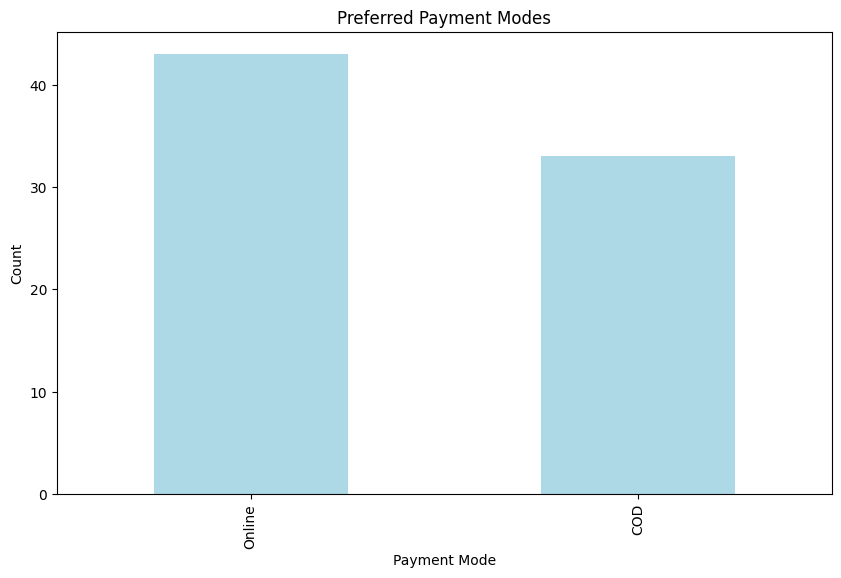

In [51]:
#Determine the most preferred payment modes.
# Group by 'payment_mode' and count the occurrences
payment_mode_counts = order_df['payment_mode'].value_counts().reset_index()
payment_mode_counts.columns = ['payment_mode', 'count']

# Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for payment mode counts
payment_mode_counts.plot(kind='bar', x='payment_mode', y='count', ax=ax, color='lightblue', legend=False)

# Adding labels and title
ax.set_xlabel('Payment Mode')
ax.set_ylabel('Count')
ax.set_title('Preferred Payment Modes')

# Display the plot
plt.show()

Insight: The bar chart illustrates the count of occurrences for each payment mode, providing insight into the most preferred payment methods.

Inference: The preferred payment modes, as indicated by higher bars, suggest the most commonly used methods by customers, influencing payment processing strategies.

Obseron: vatiMost of the customer prefers the Online payment moon: 

<h2>Time-based Analysis :</h2>

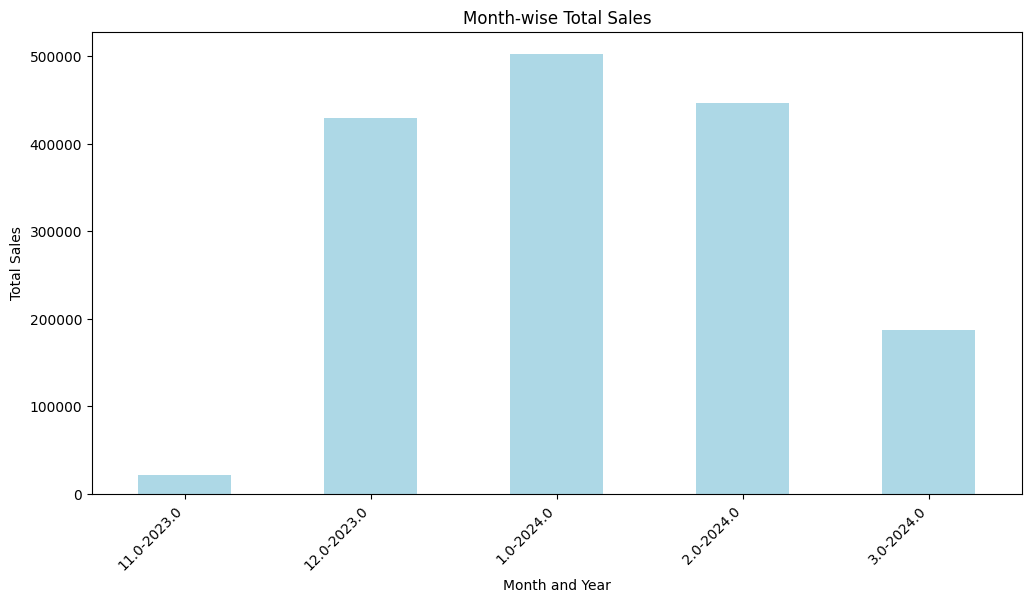

In [52]:
#Month wise total sales.
# Convert 'order_date' to datetime format
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Extract month and year from 'order_date'
order_df['month'] = order_df['order_date'].dt.month
order_df['year'] = order_df['order_date'].dt.year

# Group by 'month' and 'year' and calculate total sales
month_wise_sales = order_df.groupby(['year', 'month'])['total_price'].sum().reset_index()

# Visualize the results
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for month-wise total sales
month_wise_sales['Month_Year'] = month_wise_sales.apply(lambda row: f"{row['month']}-{row['year']}", axis=1)
month_wise_sales.plot(kind='bar', x='Month_Year', y='total_price', ax=ax, color='lightblue', legend=False)

# Adding labels and title
ax.set_xlabel('Month and Year')
ax.set_ylabel('Total Sales')
ax.set_title('Month-wise Total Sales')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The bar chart visualizes the month-wise total sales, providing insights into the sales trends over different months and years.

Inference: Peaks in the chart may indicate high-sales periods, while troughs may represent slower periods, helping to identify seasonal patterns and inform inventory management.

Observation: The most sell has done in January,2024.



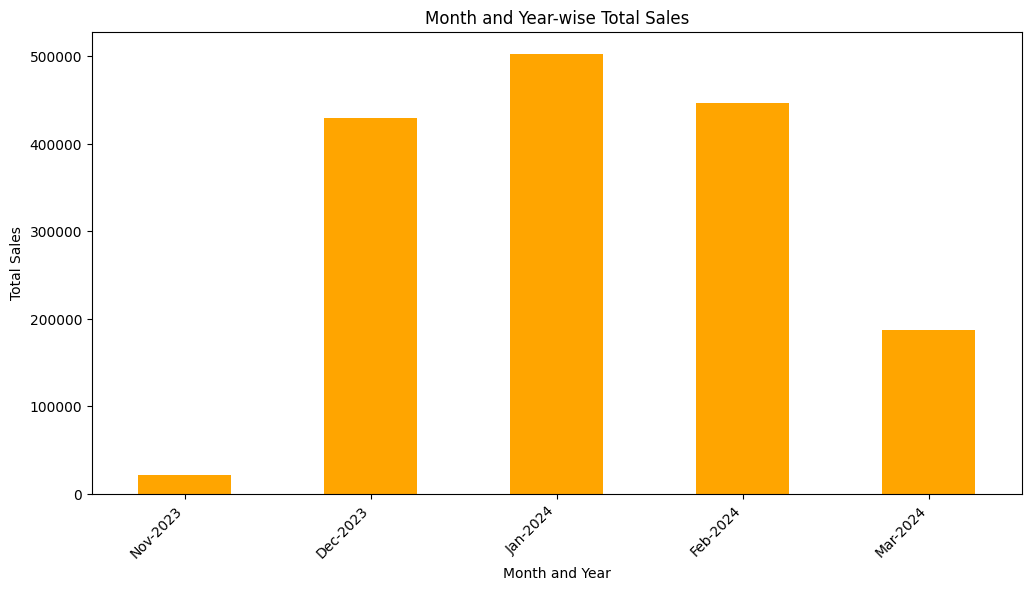

In [53]:
import calendar 
#Month and year wise total sales
# Convert 'order_date' to datetime format
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Extract month and year from 'order_date'

order_df['month'] = order_df['order_date'].dt.month
order_df['year'] = order_df['order_date'].dt.year

# Group by 'month' and 'year' and calculate total sales
month_year_wise_sales = order_df.groupby(['year', 'month'])['total_price'].sum().reset_index()

# Convert numeric month values to month names
month_year_wise_sales['month_name'] = month_year_wise_sales['month'].apply(lambda x: calendar.month_abbr[x])

# Visualize the results
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for month and year-wise total sales
month_year_wise_sales['Month_Year'] = month_year_wise_sales.apply(lambda row: f"{row['month_name']}-{row['year']}", axis=1)
month_year_wise_sales.plot(kind='bar', x='Month_Year', y='total_price', ax=ax, color='orange', legend=False)

# Adding labels and title
ax.set_xlabel('Month and Year')
ax.set_ylabel('Total Sales')
ax.set_title('Month and Year-wise Total Sales')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The bar chart, incorporating month names and years, visually presents the month and year-wise total sales, providing a more intuitive representation of sales trends.

Inference: The chart with month names enhances interpretability, making it easier to identify patterns and fluctuations in total sales over different months and years.

Obseion:rvat January month had the most sell in 202ion:

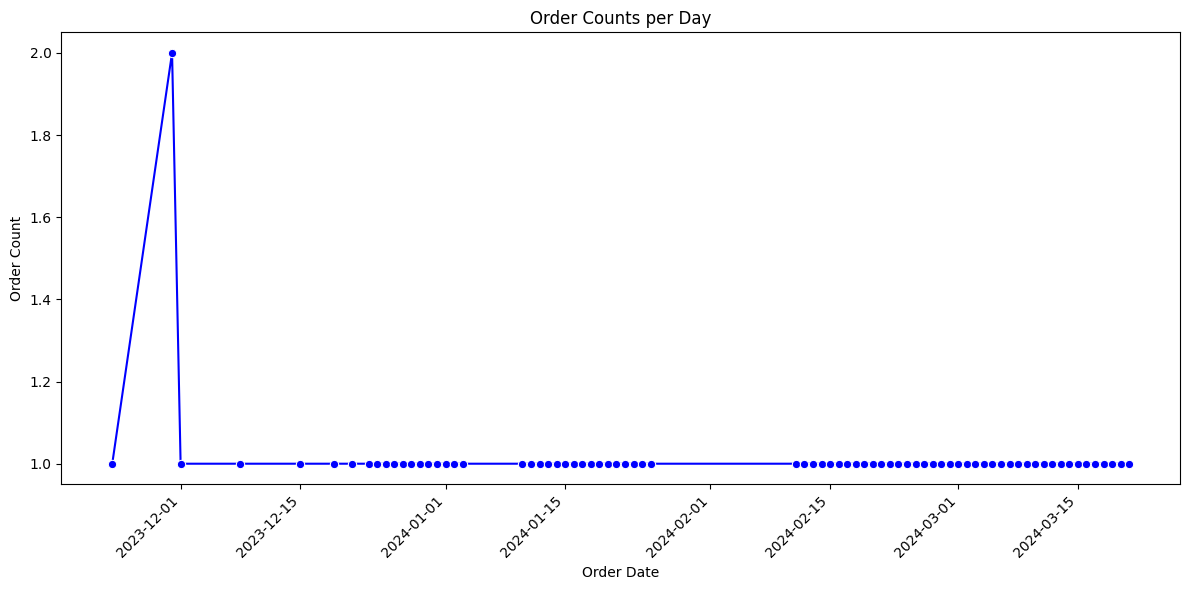

In [54]:
#Identify peak order date.
order_df['order_date']=pd.to_datetime(order_df['order_date'])
order_df['order_date_day'] = order_df['order_date'].dt.date
order_df['order_hour'] = order_df['order_date'].dt.hour
order_counts_per_day = order_df.groupby('order_date_day').size().reset_index(name='order_count')

# Plotting a line chart to visualize order counts per day
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date_day', y='order_count', data=order_counts_per_day, marker='o', color='blue')

# Adding labels and title
plt.xlabel('Order Date')
plt.ylabel('Order Count')
plt.title('Order Counts per Day')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight: The line chart effectively displays the daily order counts, providing insights into the variations and trends in daily order activities.

Inference: Peaks and valleys in the chart can indicate busy and slow periods, respectively, allowing for identification of patterns in daily order volumes.

Observation: Heighest order placed at 1st December of 2023.



<h2>Geographical Analysis :</h2>

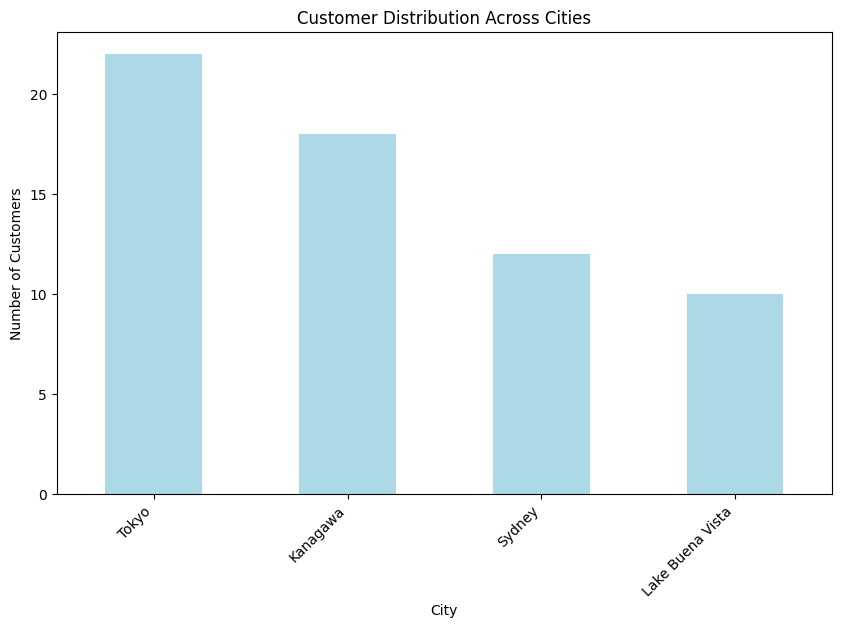

In [55]:
#Explore the distribution of customers across different cities.
# Explore the distribution of customers across different cities
customer_count_by_city = cust_df['city'].value_counts().reset_index()
customer_count_by_city.columns = ['city', 'customer_count']

# Visualize the results using a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for customer distribution across cities
customer_count_by_city.plot(kind='bar', x='city', y='customer_count', ax=ax, color='lightblue', legend=False)

# Adding labels and title
ax.set_xlabel('City')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Distribution Across Cities')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The bar chart visually presents the distribution of customers across different cities, offering insights into the concentration of the customer base in various locations.

Inference: Cities with higher bars indicate a larger customer presence, suggesting potential target areas for marketing and customer engagement strategies.

Observation: Most of the customer are from Tokyo.

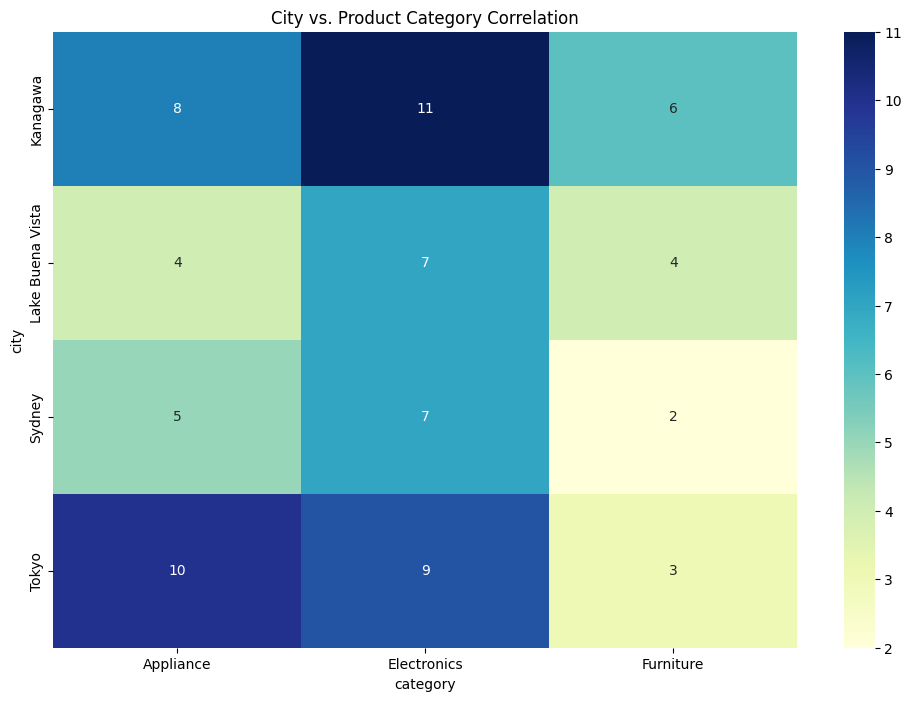

In [56]:
#Analyze whether certain products or categories are more popular in a specific city.
merge_data=pd.merge(order_df,prod_df[['product_id','category']],on = 'product_id',how='left')
final_data=pd.merge(merge_data,cust_df[['customer_id','city']],on = 'customer_id',how='left')
correlation_coefficient = final_data.groupby(['city','category']).size().unstack().fillna(0)

# Visualization
plt.figure(figsize=(12, 8))

# Heatmap for correlation matrix
sns.heatmap(correlation_coefficient, annot=True, cmap="YlGnBu")
plt.title('City vs. Product Category Correlation')
plt.show()

Insight: The heatmap visually represents the correlation between cities and product categories, indicating the popularity of certain products or categories in specific cities.

Inference: Darker areas in the heatmap suggest stronger correlations, revealing potential preferences or market trends for specific products or categories in particular cities.

Observation: Products from the Eletronic category have been sold in higher quantities in all regions. Products from Appliance category have been sold mostly in Tokyo city. Furniture have been sold mostly in Kanagawa city.



<h2>Product Performance :</h2>

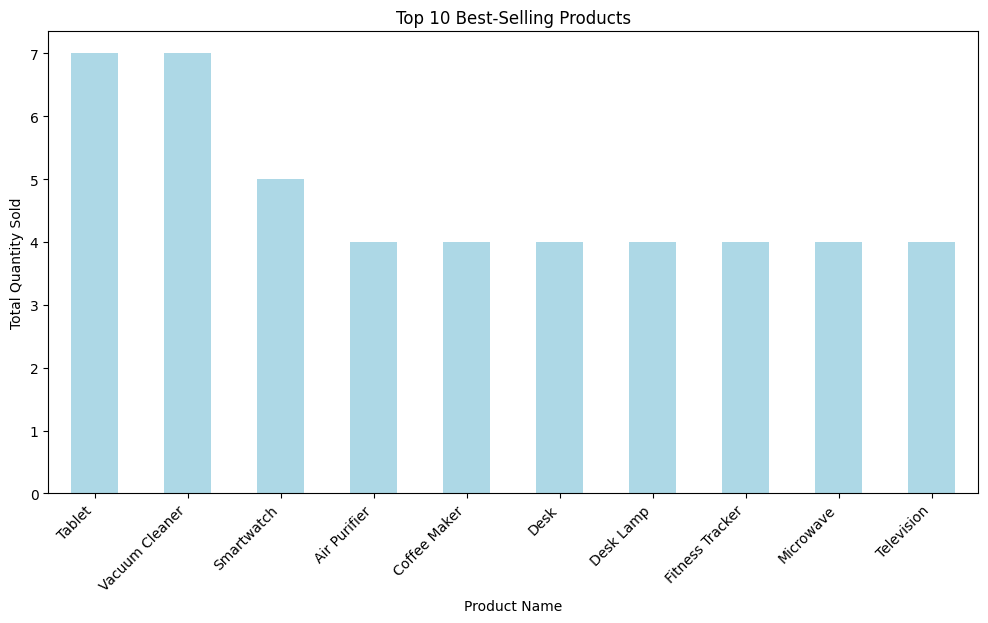

In [57]:
#Identify the top 10 best-selling products.
# Group by 'product_id' and calculate total quantity sold
product_quantity_sold = cust_order_prod_df.groupby('product_name')['quantity'].sum().reset_index()

# Identify the top 10 best-selling products
top_10_best_sellers = product_quantity_sold.nlargest(10, 'quantity')

# Visualize the results using a bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for top 10 best-selling products
top_10_best_sellers.plot(kind='bar', x='product_name', y='quantity', ax=ax, color='lightblue', legend=False)

# Adding labels and title
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Top 10 Best-Selling Products')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The bar chart visually highlights the top 10 best-selling products based on the total quantity sold, offering insights into the popularity of specific items.

Inference: Products with higher bars indicate strong sales, suggesting high demand and popularity among customers.

Observation: Tablet and Vacuuum Cleaner sold the most. Then Smartwatch, Air Purifier and so on.



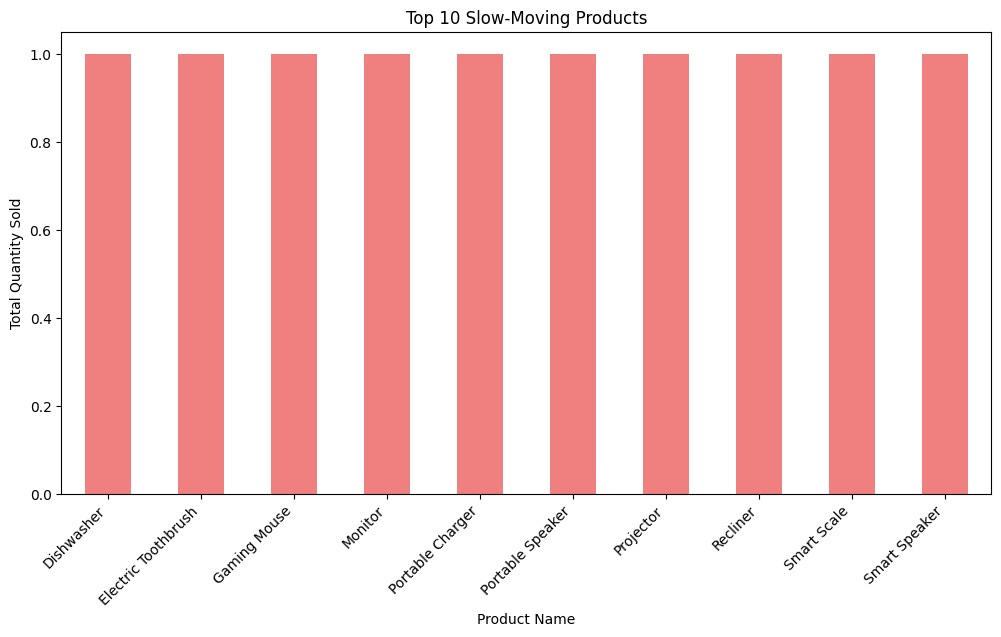

In [58]:
#Identify top 10 slow-moving products based on low sales
# Group by 'product_id' and calculate total quantity sold
product_quantity_sold = cust_order_prod_df.groupby('product_name')['quantity'].sum().reset_index()

# Identify the top 10 slow-moving products (lowest sales)
top_10_slow_moving = product_quantity_sold.nsmallest(10, 'quantity')

# Visualize the results using a bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for top 10 slow-moving products
top_10_slow_moving.plot(kind='bar', x='product_name', y='quantity', ax=ax, color='lightcoral', legend=False)

# Adding labels and title
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Top 10 Slow-Moving Products')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The bar chart visually presents the top 10 slow-moving products based on the lowest total quantity sold, providing insights into items with lower sales.

Inference: Products with lower bars indicate slower sales, suggesting potential challenges such as low demand or the need for marketing strategies to boost their popularity.

Observation: Dishwash, Eletric Toothbrush, Gaming Mouse, Monitor, Portable Charger, Projector, Recliner, Smart Scale, Smart Speaker are the most slow moving products.




<h2>Customer Retention :</h2>

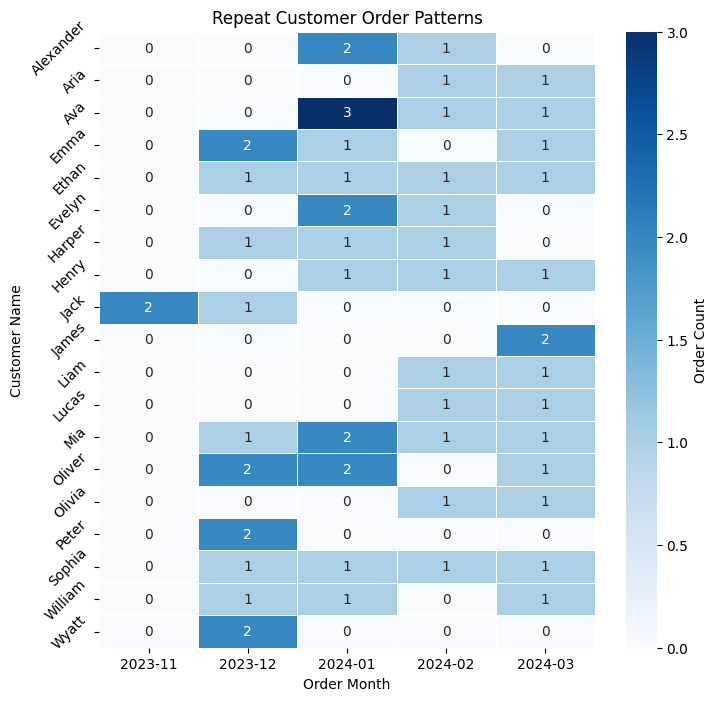

In [59]:
# Extract the year-month from the 'order_date'
cust_order_prod_df['order_month'] = cust_order_prod_df['order_date'].dt.to_period('M')

# Identify repeat customers based on the number of orders
repeat_customers = cust_order_prod_df['customer_name'].value_counts()[cust_order_prod_df['customer_name'].value_counts() > 1].index

# Create a DataFrame for repeat customers
repeat_customers_df = cust_order_prod_df[cust_order_prod_df['customer_name'].isin(repeat_customers)]

# Analyze repeat customer order patterns
order_count_per_month = repeat_customers_df.groupby(['customer_name', 'order_month']).size().reset_index(name='order_count')

# Visualize repeat customer order patterns using a seaborn heatmap with custom colorbar settings
plt.figure(figsize=(8, 8))
heatmap_data = order_count_per_month.pivot(index='customer_name', columns='order_month', values='order_count').fillna(0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Order Count'})
plt.title('Repeat Customer Order Patterns')
plt.xlabel('Order Month')
plt.ylabel('Customer Name')
plt.yticks(rotation=45, ha='right')
plt.show()

Insight: The heatmap visualization efficiently captures repeat customer order patterns over months, showcasing variations in order counts for individual customers.

Inference: Darker cells in the heatmap represent higher order counts, suggesting certain customers consistently make purchases over multiple months, indicating loyal and engaged repeat customers.

Observation: Oliver is the most repeated customer.



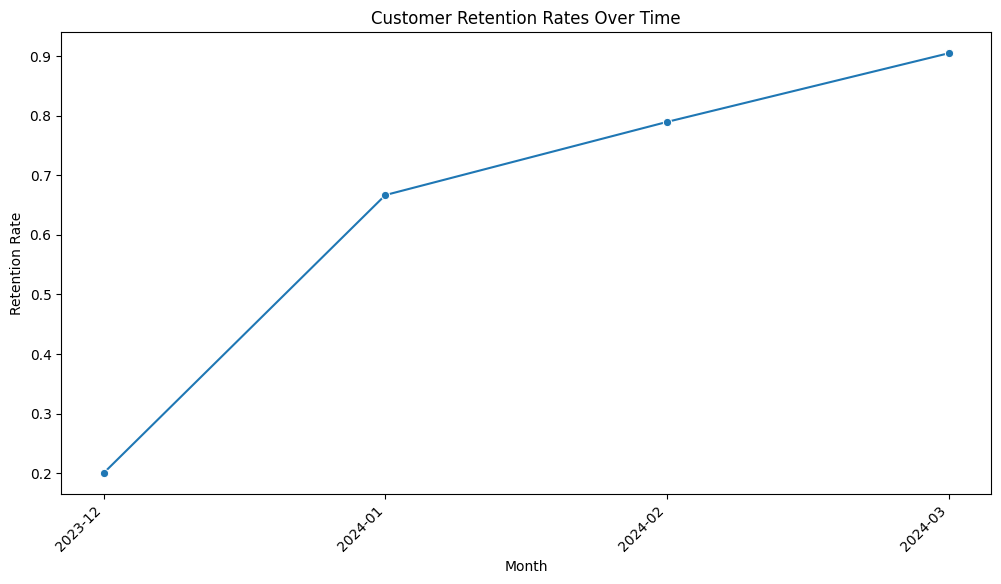

In [60]:
# Convert 'order_date' to datetime format
cust_order_prod_df['order_date'] = pd.to_datetime(cust_order_prod_df['order_date'])

# Extract year-month from the 'order_date'
cust_order_prod_df['order_month'] = cust_order_prod_df['order_date'].dt.to_period('M')

# Calculate monthly active customers
monthly_active_customers = cust_order_prod_df.groupby('order_month')['customer_id'].nunique()

# Calculate monthly retained customers (customers from the previous month)
monthly_retained_customers = cust_order_prod_df.groupby('order_month')['customer_id'].nunique().shift(1)

# Calculate customer retention rates
retention_rates = monthly_retained_customers / monthly_active_customers

# Visualize the results using a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=retention_rates.index.astype(str), y=retention_rates.values, marker='o')
plt.title('Customer Retention Rates Over Time')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: The line chart displays the customer retention rates over time, providing insights into the percentage of customers who continue to make purchases in consecutive months.

Inference: Peaks or dips in the retention rates can indicate periods of increased customer loyalty or potential challenges in customer retention.

Observation: Retention rates were higher between the time period of December 2023 to January 2024.

<h2>Payment Analysis :</h2>

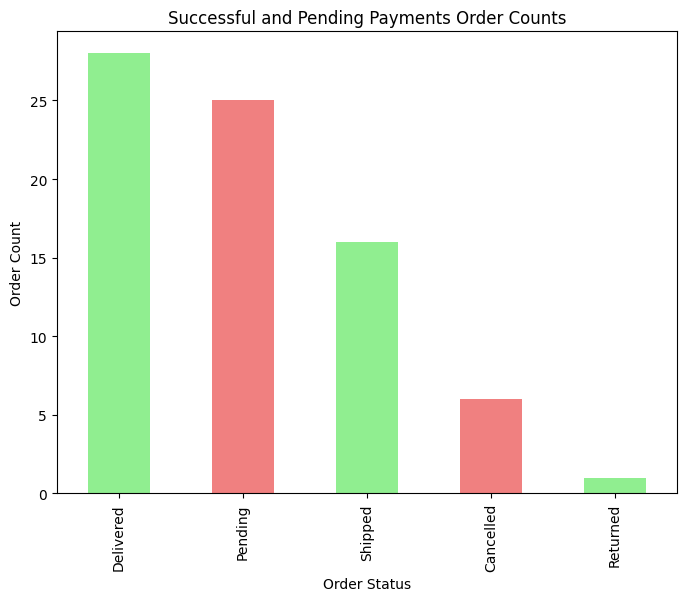

In [61]:
#Display successful and pending payments order counts.
# Calculate successful and pending payments order counts
payment_counts = order_df['order_status'].value_counts()

# Visualize the results using a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for successful and pending payments order counts
payment_counts.plot(kind='bar', ax=ax, color=['lightgreen', 'lightcoral'])

# Adding labels and title
ax.set_xlabel('Order Status')
ax.set_ylabel('Order Count')
ax.set_title('Successful and Pending Payments Order Counts')

# Display the plot
plt.show()

Inside: Calculating successful and pending payments order counts using the 'order_status' column in the 'order_df' DataFrame.

Inference: The bar plot visually represents the distribution of successful and pending payments order counts, highlighting the proportion of each category.

Observation: Most of the orders have been successfully delivered.

<h1>Conclusion :</h1>

Tokyo has the maximum number of the customers whereas Lake Buena Vista has the minimum number of customer.
Electronic category has the maximum number of products available whereas Furniture category has the minimum.
Electronic sub-cateory has the maximum number of products followed by Computer, Wearables and so on.
The Average Price is 17774.62, Maximum Price is 70000 and Minimum Price is 450.
Tablet is the most ordered product followed by Vacuum Cleaner, Air Purifier, Chair and so on.
Most of the products have been delivered, some of are pending, few have been cancelled.
Tablet and Vacuum Cleaner aren of the most popular prod followed by Smartwatch, Air Purifier and so on.
The total revenue is 1586400.
The Electronic category has the  heighest revenue percentage.
Coffee Maker is the most profitable product.
Tablet is the heighest ordered product whereas Didhwasher is the lowest ordered product.
Heighest order has been done by Oliver.
Most of the customer prefers the Online payment mode.
The most sell has done in January,2024.
Heighest order placed at 1st December of 2023.
Most of the customer are from Tokyo.
Products from the Eletronic category have been sold in higher quantities in all regions. Products from Appliance category have been sold mostly in Tokyo city. Furniture have been sold mostly in Kanagawa city.
Tablet and Vacuuum Cleaner sold the most. Then Smartwatch, Air Purifier and so on.
Dishwash, Eletric Toothbrush, Gaming Mouse, Monitor, Portable Charger, Projector, Recliner, Smart Scale, Smart Speaker are the most slow moving products.Oliver is the most repeated customer.
Retention rates were higher between the time period of December 2023 to January 2024.
Most of the orders have been successfully delivered. :